Consider the state

$$
\ket{\psi} = \frac{1}{\sqrt{2}} \left( \ket{0} + e^{i\delta} \ket{1} \right)
$$

Compute the probability of measuring in the computational basis \( p(0) \) and \( p(1) \). Also, compute the probabilities of measuring in the Hadamard basis \( p(+) \) and \( p(-) \).




In [ ]:
import qiskit
import numpy as np
from numpy import pi
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import qiskit.quantum_info as qi
from qiskit.primitives import StatevectorSampler as Sampler   #To measure Probabilities

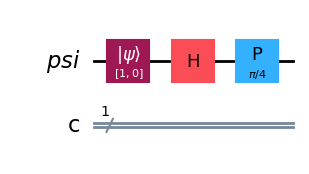

In [183]:
qreg = QuantumRegister(1,'psi')
creg = ClassicalRegister(1, 'c')
qc = QuantumCircuit(qreg,creg)
sigma = pi/4    #arbitrary choice
qc.initialize([1,0],qreg)
qc.h(qreg)
qc.p(sigma,qreg)
qc.draw('mpl')


In [184]:
sv = qi.Statevector(qc)
sv.draw('latex')

<IPython.core.display.Latex object>

In [185]:
qc_comp = qc.copy()
qc_comp.measure(qreg,creg)
sampler = Sampler()
job = sampler.run([qc_comp],shots=10000)
result = job.result()
bitvals = result[0].data.c
count = bitvals.get_counts()
shots = sum(count.values())
print("----------------Computational Basis----------------")
print(f"Probability of measuring |0> is {count['0']/shots}")
print(f"Probability of measuring |1> is {count['1']/shots}")

----------------Computational Basis----------------
Probability of measuring |0> is 0.5002
Probability of measuring |1> is 0.4998


In [ ]:
qc_hadamard = qc.copy()
qc_hadamard.h(qreg)
qc_hadamard.measure(qreg,creg)
sampler = Sampler()
job = sampler.run([qc_hadamard],shots=10000)
result = job.result()
bitvals = result[0].data.c
count = bitvals.get_counts()
shots = sum(count.values())
print("----------------Hadamard Basis----------------")
print(f"Probability of measuring |0> is {count['0']/shots}")
print(f"Probability of measuring |1> is {count['1']/shots}")

----------------Hadamard Basis----------------
Probability of measuring |0> is 0.8512
Probability of measuring |1> is 0.1488
